# 1. Setting Up Environment and Dependencies

In [ ]:
!pip install opencv-python matplotlib

In [ ]:
!pip list

In [16]:
import tensorflow as tf
import os

In [ ]:
# Prevent running out of memory (OOM) by limiting GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

# 2. Importing and Preparing the Dataset

In [30]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('CK+ dataset')

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Normalizing and Preprocessing the Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

# 4. Partitioning Data into Training, Validation, and Test Sets

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5. Designing the Convolutional Neural Network (CNN) Architecture

In [ ]:
train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))  

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

# 6. Training the CNN Model on the Training Data

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# 7. Visualizing Model Performance Metrics during Training

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluating the Trained Model's Performance on the Validation Set

In [ ]:
pip install scikit-learn

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [25]:
# Initialize metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [26]:
y_true = []
y_pred = []

In [27]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # Get the predicted class indices
    predicted_class_indices = np.argmax(yhat, axis=1)
    
    # Extend true and predicted labels
    y_true.extend(y)
    y_pred.extend(predicted_class_indices)

NameError: name 'test' is not defined

In [ ]:
# Calculate evaluation metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

In [ ]:
print("Evaluation Metrics:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# 9. Assessing Model Performance on Unseen Test Data

In [19]:
import cv2

In [20]:
img = cv2.imread('ang.png')

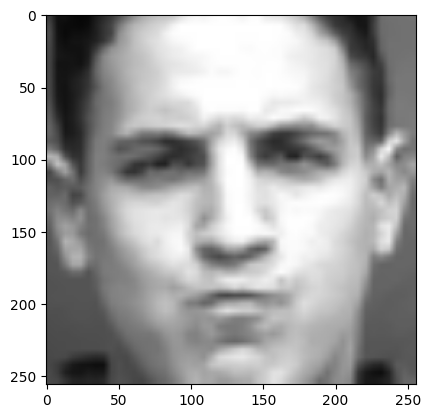

In [21]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [22]:
yhat = model.predict(np.expand_dims(resize/255, 0))
print("Predicted probabilities:", yhat)

NameError: name 'model' is not defined

In [23]:
predicted_class_index = np.argmax(yhat)

NameError: name 'yhat' is not defined

In [28]:
emotion_classes = ['Angry', 'Happy', 'Sad', 'Surprised', 'Neutral', 'Disgusted']

In [29]:
print("Predicted class is:", emotion_classes[predicted_class_index])

NameError: name 'predicted_class_index' is not defined

# 10. Saving the Trained Model for Future Use or Deployment

In [7]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','cnn.h5'))

In [18]:
new_model = load_model('cnn.h5')

In [10]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'np' is not defined